<h1>Import Dependencies</h1>

In [1]:
# Math and dataframe modules
import numpy as np

# Stats module
import statsmodels.api as sm

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# QQ plotting
from statsmodels.graphics.gofplots import ProbPlot
# Formats plots and uses seaborn theme
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Store data
%store -r model_fit

<h1> Normal Q-Q Plot</h1>

<div style="font-size:16px; border:1px solid black; padding:10px">
<font color="blue">Explained</font>
<ul>
<li>The quantile-quantile plot (Normal Q-Q Plot). Is a graphical tool used to assess if the data has a Normal or exponential distribution.</li>
<li>A Q-Q scatter plot is created by plotting two sets of quantiles against one another. If both sets came from the same distribution, then the points will form a roughlty straight line.</li>
<li>Statsmodel can be used to generate Q-Q and P-P Probability Plots using the following code:<br><strong><code>statsmodels.graphics.gofplots.ProbPlot(data, fit=False, distargs=(), a=0, loc=0, scale=1)</code></strong></li>
<li>Additional information: <a href="https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.ProbPlot.html">Documentation</a></li>
</ul>
</div>

In [2]:
# obtain normalized residuals by using
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

<div style="font-size:16px; border:1px solid black; padding:10px">
The residuals can be normalized using the following.
    
<li>Calculate influence and outlier measures: <strong><code>OLSResults.get_influence()</code></strong></li>
<li>Additional information: <a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.get_influence.html">Documentation</a></li>
<li>Studentized residuals using variance from OLS: <strong><code>OLSInfluence.resid_studentized_internal¶</code></strong></li>
<li>Additional information: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.resid_studentized_internal.html?highlight=resid_studentized_internal">Documentation</a></li>    
</div>    

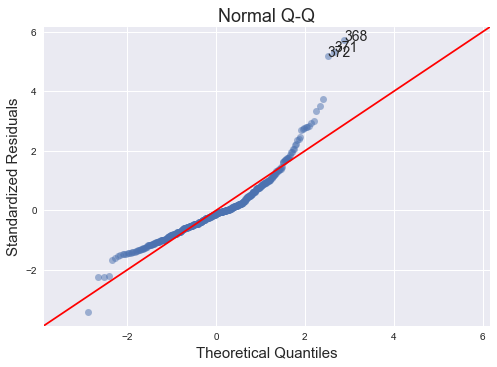

In [3]:
QQ = ProbPlot(model_norm_residuals)
normal_qq = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
normal_qq.axes[0].set_title('Normal Q-Q')
normal_qq.axes[0].set_xlabel('Theoretical Quantiles')
normal_qq.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    normal_qq.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))    

<div style="font-size:16px; border:1px solid black; padding:10px">
<font color="blue">Observations:</font>
<ul>
<li>Scatter points appear to deviate from a straight line and curves at the extreme percentiles</li>
</ul>
<font color="blue">Preliminary Conclusion:</font>
<ul>
<li>Something is wrong with the model being used and a higher-order model may be needed. aka a polynomial regression.</li>
</ul>    
</div>